https://covid19ireland-geohive.hub.arcgis.com/search

In [1]:
import pandas as pd

https://covid19ireland-geohive.hub.arcgis.com/datasets/d9be85b30d7748b5b7c09450b8aede63_0

In [2]:
df = pd.read_csv('data/Covid19CountyStatisticsHPSCIreland.csv')
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   OBJECTID                        5824 non-null   int64              
 1   ORIGID                          5824 non-null   int64              
 2   CountyName                      5824 non-null   object             
 3   PopulationCensus16              5824 non-null   int64              
 4   TimeStamp                       5824 non-null   datetime64[ns, UTC]
 5   IGEasting                       5824 non-null   int64              
 6   IGNorthing                      5824 non-null   int64              
 7   Lat                             5824 non-null   float64            
 8   Long                            5824 non-null   float64            
 9   UGI                             5824 non-null   object             
 10  ConfirmedCov

In [3]:
df = df[['CountyName',
         'PopulationCensus16',
         'TimeStamp',
         'ConfirmedCovidCases',
         'PopulationProportionCovidCases',
         'ConfirmedCovidDeaths',
         'ConfirmedCovidRecovered']].copy()
df.head()

,CountyName,PopulationCensus16,TimeStamp,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered
0,Carlow,56932,2020-02-27 00:00:00+00:00,0,NaN,NaN,NaN
1,Cavan,76176,2020-02-27 00:00:00+00:00,0,NaN,NaN,NaN
2,Clare,118817,2020-02-27 00:00:00+00:00,0,NaN,NaN,NaN
3,Cork,542868,2020-02-27 00:00:00+00:00,0,NaN,NaN,NaN
4,Donegal,159192,2020-02-27 00:00:00+00:00,0,NaN,NaN,NaN


In [4]:
county_populations = df.groupby('CountyName')['PopulationCensus16'].mean()
county_populations = pd.DataFrame(county_populations)#, columns=['Population'])
county_populations.sort_values('PopulationCensus16', inplace=True, ascending=False)
county_populations.head(10)

,PopulationCensus16
CountyName,
Dublin,1347359
Cork,542868
Galway,258058
Kildare,222504
Meath,195044
Limerick,194899
Tipperary,159553
Donegal,159192
Wexford,149722


In [7]:
df.sort_values('PopulationProportionCovidCases', ascending=False).head(10)

,CountyName,PopulationCensus16,TimeStamp,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered
5799,Cavan,76176,2020-10-09 00:00:00+00:00,1163,1526.727578,NaN,NaN
5773,Cavan,76176,2020-10-08 00:00:00+00:00,1083,1421.707624,NaN,NaN
5803,Dublin,1347359,2020-10-09 00:00:00+00:00,18732,1390.275346,NaN,NaN
5747,Cavan,76176,2020-10-07 00:00:00+00:00,1052,1381.012392,NaN,NaN
5777,Dublin,1347359,2020-10-08 00:00:00+00:00,18491,1372.388502,NaN,NaN
5751,Dublin,1347359,2020-10-07 00:00:00+00:00,18368,1363.259532,NaN,NaN
5725,Dublin,1347359,2020-10-06 00:00:00+00:00,18278,1356.579798,NaN,NaN
5721,Cavan,76176,2020-10-06 00:00:00+00:00,1029,1350.819156,NaN,NaN
5699,Dublin,1347359,2020-10-05 00:00:00+00:00,18061,1340.474217,NaN,NaN
5695,Cavan,76176,2020-10-05 00:00:00+00:00,1021,1340.317160,NaN,NaN


In [6]:
mayo['Proportion'] = mayo['ConfirmedCovidCases']/mayo['PopulationCensus16']*1E+5
mayo['Proportion'].tail()

5709    517.213636
5735    521.811091
5761    528.707272
5787    532.538485
5813    544.798363
Name: Proportion, dtype: float64

In [8]:
import matplotlib.pyplot as plt

In [9]:
colors = ['blue', 'red', 'green', 'purple', 'black', 'orange', 'dodgerblue']
linestyles = [(0, (0,0)),
             (1, (1,1)),
             (2, (1,1)),
             (0, (5,5)),
             (0, (5,10))]

In [10]:
linestyles=['solid', 'dashed', 'dotted', 'dashdot', (1, (5,10))]

In [11]:
bycounty = df.groupby('CountyName')

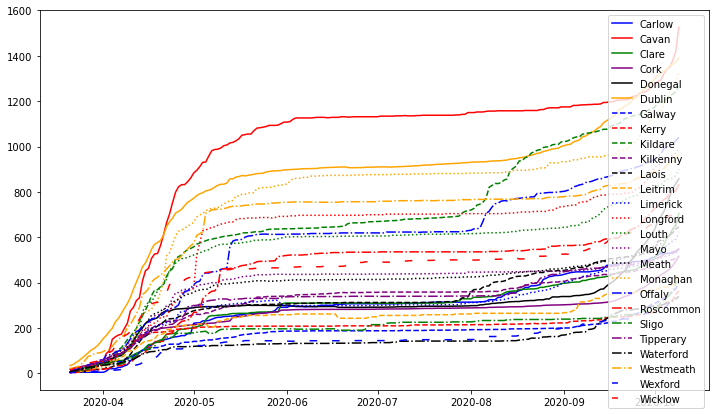

In [12]:
i = 0
j = 0
fig, ax = plt.subplots(1,1, figsize=(12,7))
for a, b in bycounty:
#     if a == "Dublin":
#         continue
    plt.plot(b['TimeStamp'], b['PopulationProportionCovidCases'], color=colors[i], ls=linestyles[j], label=a)
    if i < len(colors)-2:
        i += 1
    else:
        i = 0
        j += 1
plt.legend();

In [14]:
len(df.TimeStamp.unique())

224

In [15]:
byDate = df.groupby('TimeStamp')
holder = []
for a, b in byDate:
    temp = {"Date": a,
           "Cases": b['ConfirmedCovidCases'].max()}
    holder.append(temp)

In [16]:
df2 = pd.DataFrame(holder)
df2.head()

,Date,Cases
0,2020-02-27 00:00:00+00:00,0
1,2020-03-01 00:00:00+00:00,0
2,2020-03-02 00:00:00+00:00,0
3,2020-03-03 00:00:00+00:00,0
4,2020-03-04 00:00:00+00:00,0


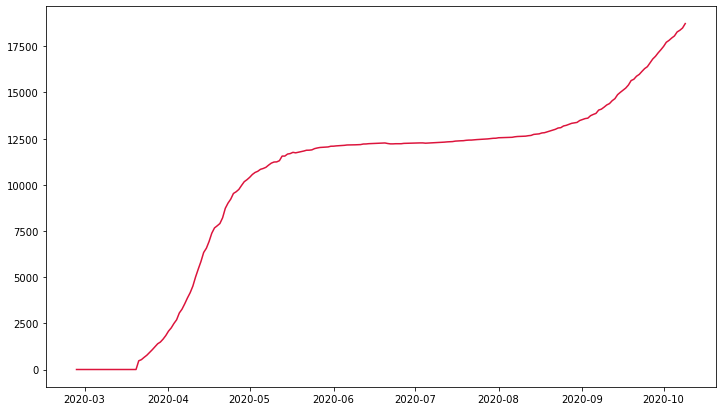

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
plt.plot(df2['Date'], df2['Cases'], color="crimson");

In [18]:
df2.tail()

,Date,Cases
219,2020-10-05 00:00:00+00:00,18061
220,2020-10-06 00:00:00+00:00,18278
221,2020-10-07 00:00:00+00:00,18368
222,2020-10-08 00:00:00+00:00,18491
223,2020-10-09 00:00:00+00:00,18732


In [19]:
df.tail()

,CountyName,PopulationCensus16,TimeStamp,ConfirmedCovidCases,PopulationProportionCovidCases,ConfirmedCovidDeaths,ConfirmedCovidRecovered
5819,Tipperary,159553,2020-10-09 00:00:00+00:00,875,548.407112,NaN,NaN
5820,Waterford,116176,2020-10-09 00:00:00+00:00,395,340.001377,NaN,NaN
5821,Westmeath,88770,2020-10-09 00:00:00+00:00,857,965.416244,NaN,NaN
5822,Wexford,149722,2020-10-09 00:00:00+00:00,519,346.642444,NaN,NaN
5823,Wicklow,142425,2020-10-09 00:00:00+00:00,1004,704.932421,NaN,NaN


In [31]:
counties = df.groupby('CountyName')['PopulationProportionCovidCases'].max()
counties = pd.DataFrame(counties)
counties.sort_values('PopulationProportionCovidCases', ascending=False, inplace=True)
counties.tail()

,PopulationProportionCovidCases
CountyName,
Sligo,410.467689
Galway,399.910098
Kerry,363.557584
Wexford,346.642444
Waterford,340.001377


In [27]:
df_pivot = pd.pivot_table(df, index='TimeStamp', columns='CountyName', values="ConfirmedCovidCases")
df_pivot.tail()

CountyName,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,Kilkenny,...,Meath,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-05 00:00:00+00:00,301,1021,707,2444,1186,18061,866,463,2691,486,...,1169,745,778,500,218,844,361,815,446,980
2020-10-06 00:00:00+00:00,302,1029,727,2507,1246,18278,901,466,2724,495,...,1190,764,781,513,229,849,362,823,469,991
2020-10-07 00:00:00+00:00,302,1052,758,2583,1299,18368,931,479,2739,497,...,1232,777,790,516,240,855,372,834,483,995
2020-10-08 00:00:00+00:00,305,1083,779,2690,1332,18491,966,515,2770,505,...,1274,789,800,520,260,862,382,845,496,997
2020-10-09 00:00:00+00:00,312,1163,838,2803,1366,18732,1032,537,2816,513,...,1346,814,811,539,269,875,395,857,519,1004


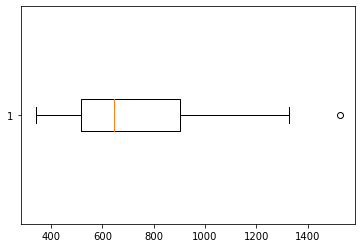

In [32]:
plt.boxplot(counties[counties.index != "Dublin"]['PopulationProportionCovidCases'], vert=False);